In [167]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,8.27)})

## visualise coin launch dates over time

In order to explain strategy, we want to visualise the number of coins launched over time. 


In [90]:
df_coins = pd.read_csv("/Users/adam/development/coingecko-analysis/data/processed_tables/coin_details.csv")

df_coins["first_date"] = df_coins["first_date"].apply(lambda x: x[:7] ) #strip it to months
df_coins["first_date"] = pd.to_datetime(df_coins["first_date"])

#drop all data before year 2018. It is old and not needed
df_coins = df_coins[df_coins["first_date"].dt.year >= 2018 ]

group_name = df_coins.groupby(by=[df_coins.first_date])

In [102]:
#group by month
# group_name.count()
my_group = group_name.count()
my_group = my_group.reset_index()
#based on this, drop all dates before jan 2018
# group_name = group_name[group_name["first_date"].dt.year >= 2018 ]

In [175]:
#display(my_group)

### Visualise the new coins per month 


[Text(0.5, 0, 'Launch Date'), Text(0, 0.5, 'Number of coins launched')]

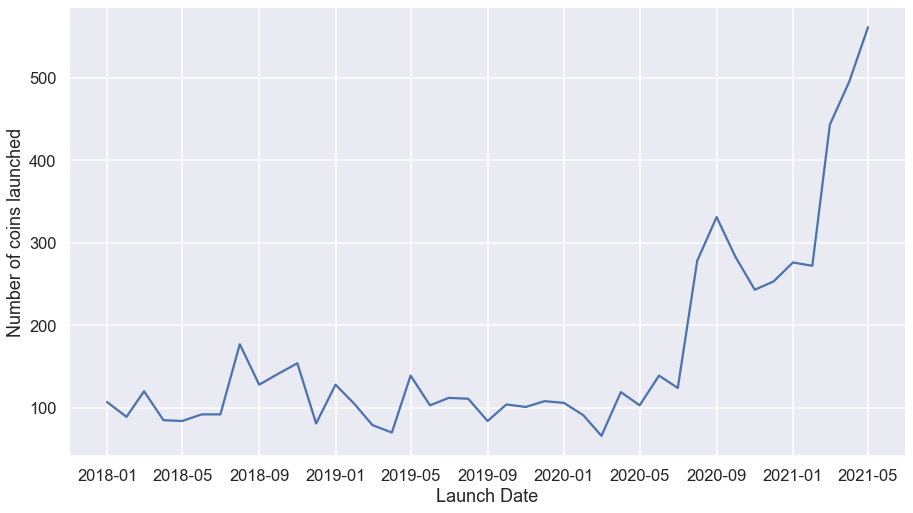

In [174]:
sns.set_context("talk")
new_coin_launches = sns.lineplot(x="first_date", y="coin_id", data=my_group)
new_coin_launches.set(xlabel='Launch Date', ylabel='Number of coins launched')

### Visualise the total number of coins

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'TTL number of coins launched')]

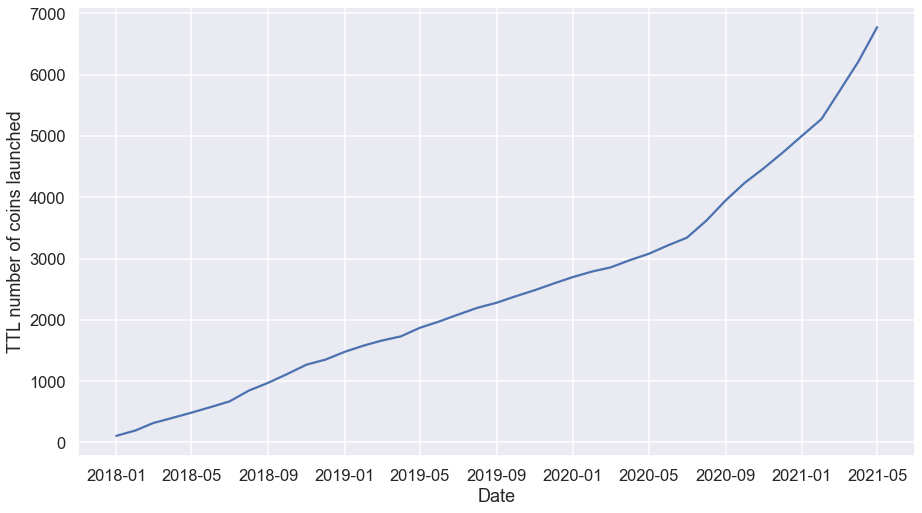

In [173]:
### cumulative number of coins now
culmulative_coins = sns.lineplot(x="first_date", y="coin_id", data=group_name.count().cumsum() )
culmulative_coins.set(xlabel='Date', ylabel='TTL number of coins launched')

